# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

2024-11-20 01:57:09.021540: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 01:57:09.022280: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-20 01:57:09.024495: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-20 01:57:09.030705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 01:57:09.043290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

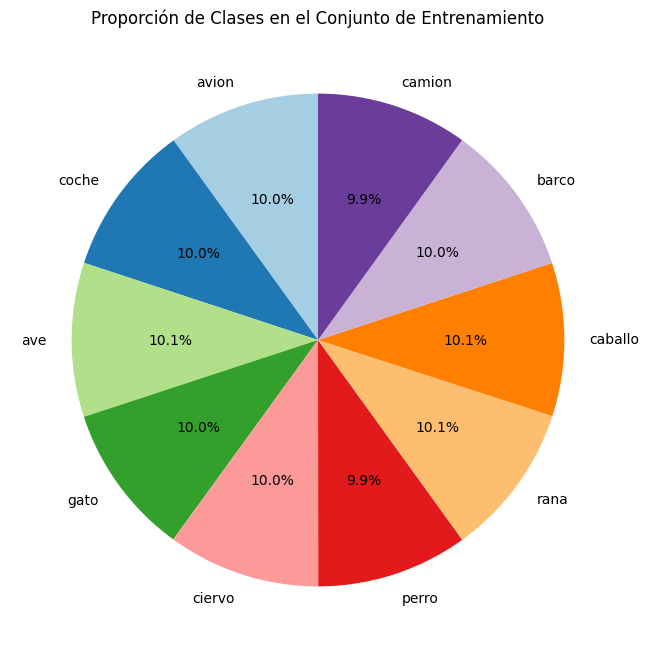

In [5]:
clases, conteo = np.unique(y_train, return_counts=True)

# Obtener etiquetas de clase a partir de MAP_ELEMENTS
etiquetas_clases = [ MAP_ELEMENTS[clase] for clase in clases]

# Crear gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(conteo, labels=etiquetas_clases, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Proporción de Clases en el Conjunto de Entrenamiento")
plt.show()

In [6]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.initializers import HeNormal, GlorotUniform


class EarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', target=0.90):
        super(EarlyStopping, self).__init__()
        self.monitor = monitor
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is not None and current >= self.target:
            print(f"\nDeteniendo el entrenamiento en la época {epoch + 1} ya que {self.monitor} alcanzó el objetivo de {self.target:.2f}.")
            self.model.stop_training = True


early_stopping_callback = EarlyStopping(monitor='val_accuracy', target=0.80)


modelo = Sequential([
    Input((32, 32, 3)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=HeNormal()),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer=HeNormal()),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer=HeNormal()),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer=GlorotUniform()),
    Dropout(0.5),
    Dense(num_classes, activation='softmax', kernel_initializer=GlorotUniform())
])

# Configuración del optimizador SGD
sgd = SGD(learning_rate=0.01, momentum=0.9)

modelo.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history = modelo.fit(x_train, y_train_one_hot, validation_data=(x_valid, y_valid_one_hot),epochs=100, batch_size=64,callbacks=[early_stopping_callback])

loss, accuracy = modelo.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.2177 - loss: 2.1510 - val_accuracy: 0.4316 - val_loss: 1.6018
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4099 - loss: 1.6059 - val_accuracy: 0.4847 - val_loss: 1.4450
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.4627 - loss: 1.4722 - val_accuracy: 0.5168 - val_loss: 1.3539
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5029 - loss: 1.3701 - val_accuracy: 0.5611 - val_loss: 1.2698
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5294 - loss: 1.3040 - val_accuracy: 0.5794 - val_loss: 1.2012
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5464 - loss: 1.2634 - val_accuracy: 0.6240 - val_loss: 1.1301
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5730 - loss: 1.1943 - val_accuracy: 0.5849 - val_loss: 1.1707
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5814 - loss: 1

In [ ]:

import plotly.graph_objects as go
import numpy as np
import pandas as pd

def plot_history(history, model_name):
    # Extraer la información del objeto history
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy')
    loss = history.history['loss']
    val_loss = history.history.get('val_loss')

    # Definir las épocas en base a la longitud de los datos
    epochs = np.arange(1, len(acc) + 1)

    # Calcular diferencias absolutas entre entrenamiento y validación
    acc_diff = np.abs(np.array(acc) - np.array(val_acc)) if val_acc is not None else None
    loss_diff = np.abs(np.array(loss) - np.array(val_loss)) if val_loss is not None else None

    # Umbrales para detectar sobreajuste
    acc_threshold = 0.05  # Diferencia del 5% en precisión
    loss_threshold = 0.1  # Diferencia del 10% en pérdida

    # Detectar sobreajuste en precisión y pérdida
    acc_overfit = (acc_diff > acc_threshold) if acc_diff is not None else None
    loss_overfit = (loss_diff > loss_threshold) if loss_diff is not None else None

    # Función para encontrar intersecciones
    def encontrar_intersecciones(x, y1, y2):
        intersecciones_x = []
        intersecciones_y = []
        for i in range(1, len(x)):
            if (y1[i-1] - y2[i-1]) * (y1[i] - y2[i]) <= 0:  # Cambio de signo
                intersecciones_x.append(x[i])
                intersecciones_y.append((y1[i] + y2[i]) / 2)
        return intersecciones_x, intersecciones_y

    # Encontrar intersecciones entre las curvas de accuracy
    acc_inter_x, acc_inter_y = encontrar_intersecciones(epochs, acc, val_acc)

    # Encontrar intersecciones entre las curvas de loss
    loss_inter_x, loss_inter_y = encontrar_intersecciones(epochs, loss, val_loss)

    # --- Primer gráfico: curvas de exactitud y pérdida ---
    fig_curvas = go.Figure()

    # Agregar líneas de accuracy
    fig_curvas.add_trace(go.Scatter(x=epochs, y=acc, mode='lines', name='Exactitud de Entrenamiento', line=dict(color='blue')))
    fig_curvas.add_trace(go.Scatter(x=epochs, y=val_acc, mode='lines', name='Exactitud de Validación', line=dict(color='green')))

    # Agregar intersecciones de accuracy
    fig_curvas.add_trace(go.Scatter(x=acc_inter_x, y=acc_inter_y, mode='markers', name='Intersección de Exactitud', marker=dict(color='black', size=10)))

    # Agregar líneas de pérdida
    fig_curvas.add_trace(go.Scatter(x=epochs, y=loss, mode='lines', name='Pérdida de Entrenamiento', line=dict(color='red')))
    fig_curvas.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines', name='Pérdida de Validación', line=dict(color='orange')))

    # Agregar intersecciones de loss
    fig_curvas.add_trace(go.Scatter(x=loss_inter_x, y=loss_inter_y, mode='markers', name='Intersección de Pérdida', marker=dict(color='black', size=10)))

    # Configurar el primer gráfico con tamaño reducido
    fig_curvas.update_layout(
        title=f'Curvas de Exactitud y Pérdida  ({model_name})',
        xaxis_title='Épocas',
        yaxis_title='Valor',
        hovermode='x unified',
        template='seaborn',
        xaxis=dict(range=[epochs[0], epochs[-1]]),  # Sincronizar el rango del eje x
        width=700,  # Ancho reducido
        height=500  # Altura estándar
    )

    # --- Segundo gráfico: diferencias en barras ---
    fig_diferencias = go.Figure()

    if acc_diff is not None and loss_diff is not None:
        # Trazas para las diferencias de precisión
        fig_diferencias.add_trace(go.Bar(
            x=epochs, 
            y=acc_diff, 
            name='Diferencia de Exactitud',
            marker_color='lightblue',
            opacity=0.6
        ))

        # Trazas para las diferencias de pérdida
        fig_diferencias.add_trace(go.Bar(
            x=epochs, 
            y=loss_diff, 
            name='Diferencia de Pérdida',
            marker_color='lightcoral',
            opacity=0.6
        ))

    # Configurar el segundo gráfico con tamaño reducido
    fig_diferencias.update_layout(
        title=f'Diferencias entre Entrenamiento y Validación ({model_name})',
        xaxis_title='Épocas',
        yaxis_title='Diferencia',
        hovermode='x unified',
        template='seaborn',
        xaxis=dict(range=[epochs[0], epochs[-1] + 1]),  # Sincronizar el rango del eje x
        width=700,  # Ancho reducido
        height=500  # Altura estándar
    )

    # Mostrar los gráficos
    fig_curvas.show()
    fig_diferencias.show()


plot_history(history,'CNN')

In [ ]:

def plot_comparacion_modelos(historiales, nombres_modelos, resultados_prueba):
    # Verificar que las listas tengan el mismo tamaño
    #if len(historiales) != len(nombres_modelos) or len(historiales) != len(resultados_prueba):
    #    raise ValueError("El número de historiales, nombres de modelos y resultados de prueba debe coincidir.")

    # Inicializar listas para almacenar los valores de la última época
    exactitud_entrenamiento = []
    exactitud_validacion = []
    perdida_entrenamiento = []
    perdida_validacion = []
    exactitud_prueba = []
    perdida_prueba = []

    # Recorrer los historiales y extraer los valores de la última época y los resultados de prueba
    for historial, resultado_prueba in zip(historiales, resultados_prueba):
        prueba_perdida, prueba_exactitud = resultado_prueba[0], resultado_prueba[1]

        exactitud = historial.history['accuracy']
        exactitud_val = historial.history.get('val_accuracy')
        perdida = historial.history['loss']
        perdida_val = historial.history.get('val_loss')

        ultima_epoca = len(exactitud) - 1

        # Guardar los valores de la última época y redondearlos al tercer decimal
        #exactitud_entrenamiento.append(round(exactitud[ultima_epoca], 3))
        #exactitud_validacion.append(round(exactitud_val[ultima_epoca], 3) if exactitud_val is not None else 'N/A')
        #perdida_entrenamiento.append(round(perdida[ultima_epoca], 3))
        #perdida_validacion.append(round(perdida_val[ultima_epoca], 3) if perdida_val is not None else 'N/A')

        # Guardar los valores de la última época y redondearlos al tercer decimal
        exactitud_entrenamiento.append(round(np.mean(exactitud), 3))
        exactitud_validacion.append(round(np.mean(exactitud_val), 3) if exactitud_val is not None else 'N/A')
        perdida_entrenamiento.append(round(np.mean(perdida), 3))
        perdida_validacion.append(round(np.mean(perdida_val), 3) if perdida_val is not None else 'N/A')
        # Guardar los valores de precisión y pérdida en prueba
        exactitud_prueba.append(round(prueba_exactitud, 3))
        perdida_prueba.append(round(prueba_perdida, 3))


    df =  pd.DataFrame({
        'Modelo':nombres_modelos,
        'Media(Exactitud_entrenamiento)': exactitud_entrenamiento,
        'Media(Exactitud_validacion)': exactitud_validacion,
        'Media(Exactiud_prueba)': exactitud_prueba,
        'Media(Perdida_entrenamiento)': perdida_entrenamiento,
        'Media(Perdida_validacion)':perdida_validacion,
        'Media(Perdida_prueba)':perdida_prueba
        }
    )

    # Crear el gráfico de barras
    fig = go.Figure()

    # Añadir las barras en el orden especificado
    fig.add_trace(go.Bar(
        x=nombres_modelos,
        y=exactitud_entrenamiento,
        name='Exactitud de Entrenamiento',
        marker_color='blue',
        text=exactitud_entrenamiento,  
        textposition='outside',  
        hoverinfo='none'  
    ))

    fig.add_trace(go.Bar(
        x=nombres_modelos,
        y=exactitud_validacion,
        name='Exactitud de Validación',
        marker_color='green',
        text=exactitud_validacion,  
        textposition='outside',  
        hoverinfo='none'  
    ))

    fig.add_trace(go.Bar(
        x=nombres_modelos,
        y=perdida_entrenamiento,
        name='Pérdida de Entrenamiento',
        marker_color='red',
        text=perdida_entrenamiento,  
        textposition='outside',  
        hoverinfo='none'  
    ))

    fig.add_trace(go.Bar(
        x=nombres_modelos,
        y=perdida_validacion,
        name='Pérdida de Validación',
        marker_color='orange',
        text=perdida_validacion,  
        textposition='outside', 
        hoverinfo='none'  
    ))

    fig.add_trace(go.Bar(
        x=nombres_modelos,
        y=exactitud_prueba,
        name='Exactitud de Prueba',
        marker_color='purple',
        text=exactitud_prueba,  
        textposition='outside',  
        hoverinfo='none'  
    ))

    fig.add_trace(go.Bar(
        x=nombres_modelos,
        y=perdida_prueba,
        name='Pérdida de Prueba',
        marker_color='darkred',
        text=perdida_prueba,  
        textposition='outside',  
        hoverinfo='none'  
    ))

    # Configurar el layout del gráfico
    fig.update_layout(
        title='Comparativa de Modelos',
        barmode='group',
        xaxis_title='Modelos',
        yaxis_title='Valor',
        template='seaborn',
        width=1200,  
        height=600
    )

    # Mostrar el gráfico
    fig.show()
    return df
    
# Crear listas de histories, nombres de modelos y tests.
historias = [history]
modelos = ["Modelo CNN"]

tests = [modelo.evaluate(x_test, y_test_one_hot)]
# Llamar a la función para mostrar el gráfico
df=plot_comparacion_modelos(historias, modelos,tests)
df


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

# Generar predicciones del modelo
predicciones = modelo.predict(x_test)
predicciones_clases = np.argmax(predicciones, axis=1)  # Clases predichas

# Obtener las clases verdaderas
verdaderas_clases = np.argmax(y_test_one_hot, axis=1)  # Etiquetas verdaderas

# Crear la matriz de confusión
matriz_confusion = confusion_matrix(verdaderas_clases, predicciones_clases)

# Usar MAP_ELEMENTS para los nombres de las clases
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}
clases = [MAP_ELEMENTS[i] for i in range(len(MAP_ELEMENTS))]

# Visualizar la matriz de confusión como diagrama
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=clases).plot(cmap='Blues', ax=plt.gca())
plt.title("Matriz de Confusión")
plt.show()

print("\nReporte de clasificación:")
print(classification_report(verdaderas_clases, predicciones_clases, target_names=clases))



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Verifica si y_train está en formato one-hot y convierte si es necesario
if len(y_train.shape) > 1 and y_train.shape[1] > 1:  # Si está en formato one-hot
    y_train_classes = np.argmax(y_train, axis=1)  # Convertir a etiquetas enteras
else:
    y_train_classes = y_train.flatten()

# Filtrar las imágenes de la clase 3
clase_objetivo = 3
X_clase_3 = x_train[y_train_classes == clase_objetivo]
y_clase_3 = y_train[y_train_classes == clase_objetivo]

# Verificar que X_clase_3 no esté vacío
assert X_clase_3.shape[0] > 0, "No se encontraron imágenes para la clase 3."

# Generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

n_aumentadas = 2000
X_clase_3_aug = []
y_clase_3_aug = []

for X_batch, y_batch in datagen.flow(X_clase_3, y_clase_3, batch_size=1):
    X_clase_3_aug.append(X_batch[0])
    y_clase_3_aug.append(y_batch[0])
    if len(X_clase_3_aug) >= n_aumentadas:
        break

X_clase_3_aug = np.array(X_clase_3_aug)
y_clase_3_aug = np.array(y_clase_3_aug)

print("Número de imágenes generadas:", X_clase_3_aug.shape[0])

y_clase_3_aug=to_categorical(y_clase_3_aug, 10)
y_train=to_categorical(y_train,10)


print(y_clase_3_aug.shape)
print(y_train.shape)

X_train_combined = np.concatenate([x_train, X_clase_3_aug], axis=0)
y_train_combined = np.concatenate([y_train, y_clase_3_aug], axis=0)

indices = np.random.permutation(len(X_train_combined))
X_train_combined = X_train_combined[indices]
y_train_combined = y_train_combined[indices]

print("Dimensiones del nuevo conjunto de entrenamiento:")
print("X_train_combined:", X_train_combined.shape)
print("y_train_combined:", y_train_combined.shape)


In [ ]:
clases, conteo = np.unique(y_train_combined, return_counts=True)

# Obtener etiquetas de clase a partir de MAP_ELEMENTS
etiquetas_clases = [ MAP_ELEMENTS[clase] for clase in clases]

# Crear gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(conteo, labels=etiquetas_clases, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Proporción de Clases en el Conjunto de Entrenamiento")
plt.show()

In [ ]:

history_2=modelo.fit(
    X_train_combined, y_train_combined,
    validation_data=(x_valid, y_valid),
    epochs=20,
    batch_size=32
)

loss, accuracy = modelo.evaluate(x_test, y_test_one_hot)
print(f"Pérdida en conjunto de prueba: {loss:.4f}")
print(f"Precisión en conjunto de prueba: {accuracy:.4f}")